<a href="https://colab.research.google.com/github/SantiagoMB21/analisis-exploratorio/blob/main/Copy_of_Preparaci%C3%B3ndatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

In [ ]:
# Cargar el archivo CSV
file_path = '/content/drive/MyDrive/Análisis exploratorio de datos/datosLEYE-variables.csv'  # Actualiza la ruta del archivo
data = pd.read_csv(file_path)

Tengo algunas columnas que quiero eliminar, porque no me generan información importante para mis analisis

In [ ]:
# Eliminar columnas innecesarias
columns_to_keep = [
    'GLOBAL.UNIQUE.IDENTIFIER',
    'OBSERVATION.COUNT',
    'LATITUDE',
    'LONGITUDE',
    'OBSERVATION.DATE',
    'PROTOCOL.TYPE',
    'DAILY.PRECIPITATION',
    'MONTHLY.PRECIPITATION',
    'MONTLY.TEMPERATURE',
    'cobertura_agua_proporcion'
]

data = data[columns_to_keep]

In [ ]:
# Mostrar las primeras filas del dataset para confirmar que solo se conservan las columnas deseadas
print(data.head())

                          GLOBAL.UNIQUE.IDENTIFIER  OBSERVATION.COUNT  \
0   URN:CornellLabOfOrnithology:EBIRD:OBS409764406                  1   
1   URN:CornellLabOfOrnithology:EBIRD:OBS666054430                  2   
2  URN:CornellLabOfOrnithology:EBIRD:OBS1227922401                  1   
3   URN:CornellLabOfOrnithology:EBIRD:OBS286564168                  1   
4   URN:CornellLabOfOrnithology:EBIRD:OBS372036947                  4   

   LATITUDE  LONGITUDE OBSERVATION.DATE PROTOCOL.TYPE  DAILY.PRECIPITATION  \
0  6.405548 -75.424361       11/17/2001    Historical            20.287292   
1  6.984203 -75.112168        1/22/2011     Traveling             0.000000   
2  6.969255 -75.129226        3/25/2012    Historical            15.229471   
3  6.148342 -75.375985        9/21/2014          Area             5.510858   
4  6.110034 -75.417152         1/2/2016    Stationary             0.000000   

   MONTHLY.PRECIPITATION  MONTLY.TEMPERATURE  cobertura_agua_proporcion  
0             201.

In [ ]:
data.tail()

,GLOBAL.UNIQUE.IDENTIFIER,OBSERVATION.COUNT,LATITUDE,LONGITUDE,OBSERVATION.DATE,PROTOCOL.TYPE,DAILY.PRECIPITATION,MONTHLY.PRECIPITATION,MONTLY.TEMPERATURE,cobertura_agua_proporcion
2953,URN:CornellLabOfOrnithology:EBIRD:OBS2020830107,1,3.890721,-76.344287,4/1/2024,Traveling,0.000000,174.932730,19.104590,0.776139
2954,URN:CornellLabOfOrnithology:EBIRD:OBS2028428895,1,3.890721,-76.344287,4/1/2024,Traveling,0.000000,174.932730,19.104590,0.776139
2955,URN:CornellLabOfOrnithology:EBIRD:OBS2307774620,3,3.500485,-76.349337,4/12/2024,Traveling,0.567761,195.926351,20.013835,0.776139
2956,URN:CornellLabOfOrnithology:EBIRD:OBS2348395101,2,3.771217,-77.169880,7/17/2024,Traveling,27.996582,432.686287,17.463352,0.776139
2957,URN:CornellLabOfOrnithology:EBIRD:OBS2314030696,1,3.500485,-76.349337,7/13/2024,Traveling,0.000000,31.746340,18.959747,0.776139


In [ ]:
data.shape

(2958, 10)

In [ ]:
data.describe()

,OBSERVATION.COUNT,LATITUDE,LONGITUDE,DAILY.PRECIPITATION,MONTHLY.PRECIPITATION,MONTLY.TEMPERATURE,cobertura_agua_proporcion
count,2958.000000,2958.000000,2958.000000,2958.000000,2958.000000,2958.000000,2958.000000
mean,4.821163,4.152455,-76.142378,5.821501,154.275512,19.779061,0.776139
std,12.936885,0.834408,0.514063,11.767721,110.138449,2.333235,0.271662
min,1.000000,2.611840,-77.490860,0.000000,12.312138,7.399026,0.000000
25%,1.000000,3.626733,-76.397705,0.000000,80.521801,18.213785,0.776139
50%,2.000000,3.881371,-76.350898,0.000000,124.467836,19.281998,0.776139
75%,4.000000,4.764559,-75.618489,7.675361,197.090704,21.066854,0.959739
max,200.000000,6.984203,-75.001629,122.390594,769.965492,27.057214,1.756380


# 1. Análisis univariado de la Temperatura mensual promedio
antes de continuar con el procesamiento de los datos, vamos a hacer un análisis univariado

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Descripción estadística básica de la variable 'MONTLY.TEMPERATURE'
descripcion = data['MONTLY.TEMPERATURE'].describe()
print("Descripción estadística de MONTLY.TEMPERATURE:")
print(descripcion)

Descripción estadística de MONTLY.TEMPERATURE:
count    2958.000000
mean       19.779061
std         2.333235
min         7.399026
25%        18.213785
50%        19.281998
75%        21.066854
max        27.057214
Name: MONTLY.TEMPERATURE, dtype: float64


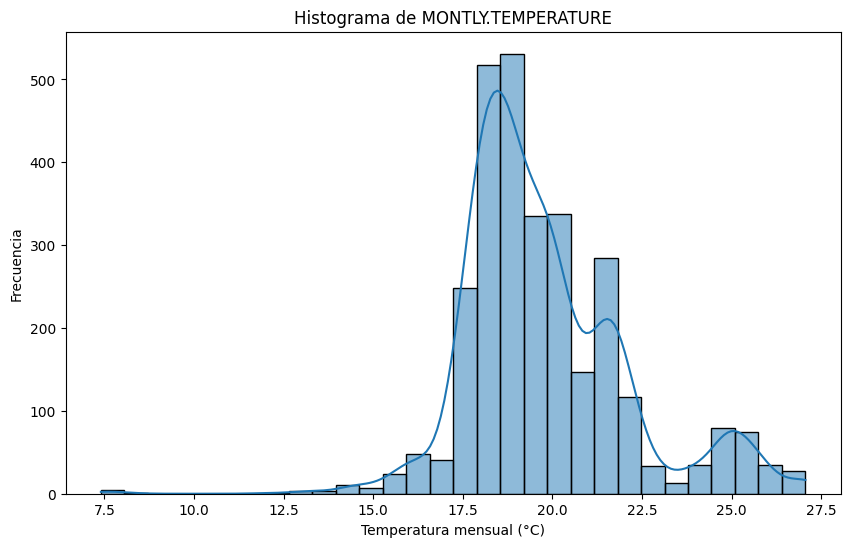

In [ ]:
# 2. Visualización: Histograma de 'MONTLY.TEMPERATURE'
plt.figure(figsize=(10, 6))
sns.histplot(data['MONTLY.TEMPERATURE'], bins=30, kde=True)
plt.title('Histograma de MONTLY.TEMPERATURE')
plt.xlabel('Temperatura mensual (°C)')
plt.ylabel('Frecuencia')
plt.show()


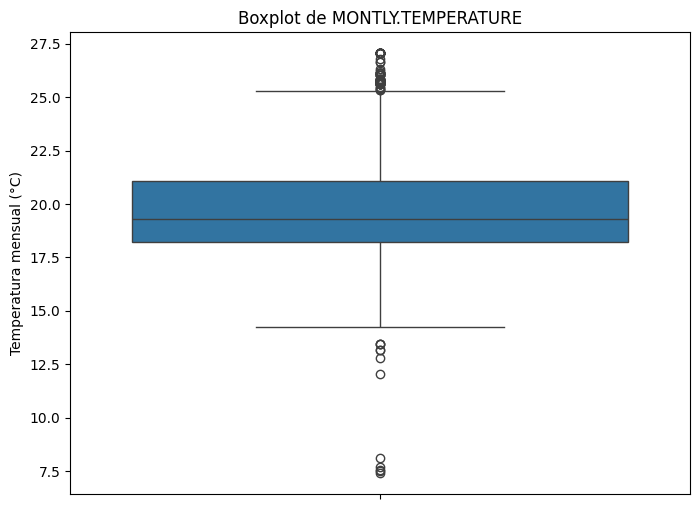

In [ ]:
# 3. Visualización: Boxplot de 'MONTLY.TEMPERATURE'
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['MONTLY.TEMPERATURE'])
plt.title('Boxplot de MONTLY.TEMPERATURE')
plt.ylabel('Temperatura mensual (°C)')
plt.show()

# 2. Analisis univariado precipitación diaria

In [ ]:
# 1. Descripción estadística básica de la variable 'DAILY.PRECIPITATION'
descripcion = data['DAILY.PRECIPITATION'].describe()
print("Descripción estadística de DAILY.PRECIPITATION:")
print(descripcion)

Descripción estadística de DAILY.PRECIPITATION:
count    2958.000000
mean        5.821501
std        11.767721
min         0.000000
25%         0.000000
50%         0.000000
75%         7.675361
max       122.390594
Name: DAILY.PRECIPITATION, dtype: float64


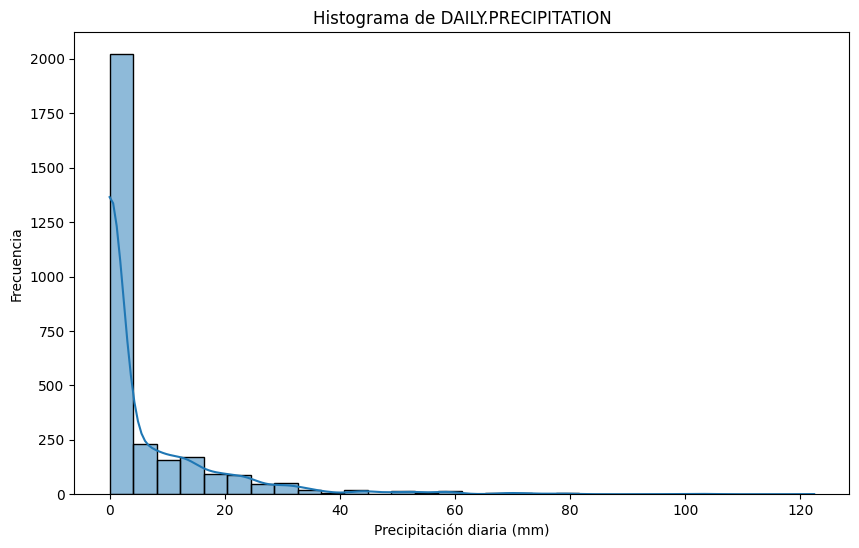

In [ ]:
# 2. Visualización: Histograma de 'DAILY.PRECIPITATION'
plt.figure(figsize=(10, 6))
sns.histplot(data['DAILY.PRECIPITATION'], bins=30, kde=True)
plt.title('Histograma de DAILY.PRECIPITATION')
plt.xlabel('Precipitación diaria (mm)')
plt.ylabel('Frecuencia')
plt.show()

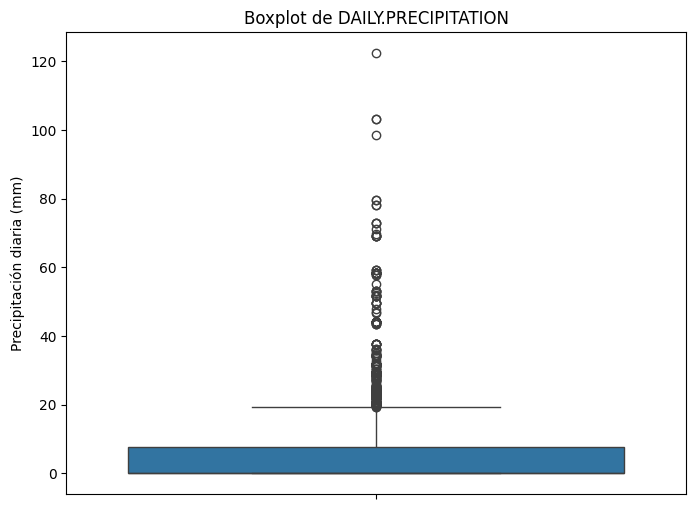

In [ ]:
# 3. Visualización: Boxplot de 'DAILY.PRECIPITATION'
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['DAILY.PRECIPITATION'])
plt.title('Boxplot de DAILY.PRECIPITATION')
plt.ylabel('Precipitación diaria (mm)')
plt.show()

Valores nulos

In [ ]:
# Verificar si hay valores nulos en el dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2958 entries, 0 to 2957
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GLOBAL.UNIQUE.IDENTIFIER   2958 non-null   object 
 1   OBSERVATION.COUNT          2958 non-null   int64  
 2   LATITUDE                   2958 non-null   float64
 3   LONGITUDE                  2958 non-null   float64
 4   OBSERVATION.DATE           2958 non-null   object 
 5   PROTOCOL.TYPE              2958 non-null   object 
 6   DAILY.PRECIPITATION        2958 non-null   float64
 7   MONTHLY.PRECIPITATION      2958 non-null   float64
 8   MONTLY.TEMPERATURE         2958 non-null   float64
 9   cobertura_agua_proporcion  2958 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 231.2+ KB


# 3. Analisis univariado precipitación mensual

In [ ]:
# 1. Descripción estadística básica de la variable 'MONTHLY.PRECIPITATION'
descripcion = data['MONTHLY.PRECIPITATION'].describe()
print("Descripción estadística de MONTHLY.PRECIPITATION:")
print(descripcion)

Descripción estadística de MONTHLY.PRECIPITATION:
count    2958.000000
mean      154.275512
std       110.138449
min        12.312138
25%        80.521801
50%       124.467836
75%       197.090704
max       769.965492
Name: MONTHLY.PRECIPITATION, dtype: float64


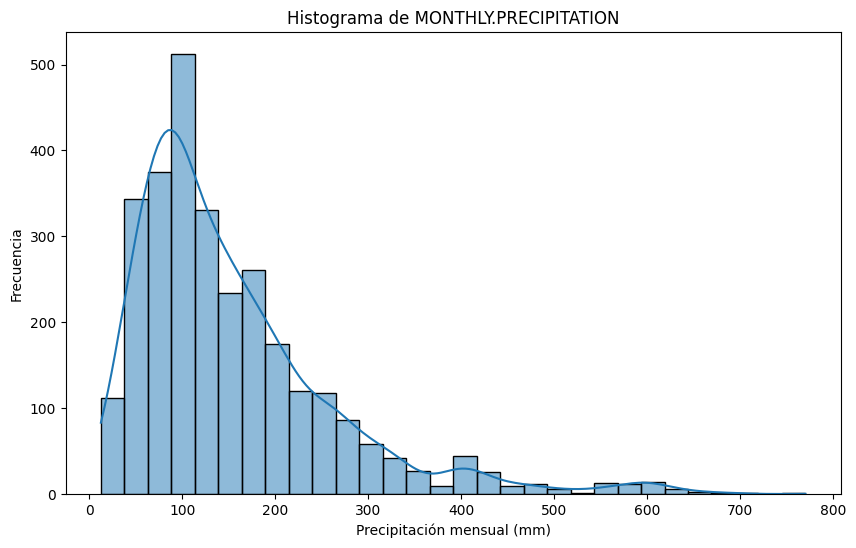

In [ ]:
# 2. Visualización: Histograma de 'MONTHLY.PRECIPITATION'
plt.figure(figsize=(10, 6))
sns.histplot(data['MONTHLY.PRECIPITATION'], bins=30, kde=True)
plt.title('Histograma de MONTHLY.PRECIPITATION')
plt.xlabel('Precipitación mensual (mm)')
plt.ylabel('Frecuencia')
plt.show()

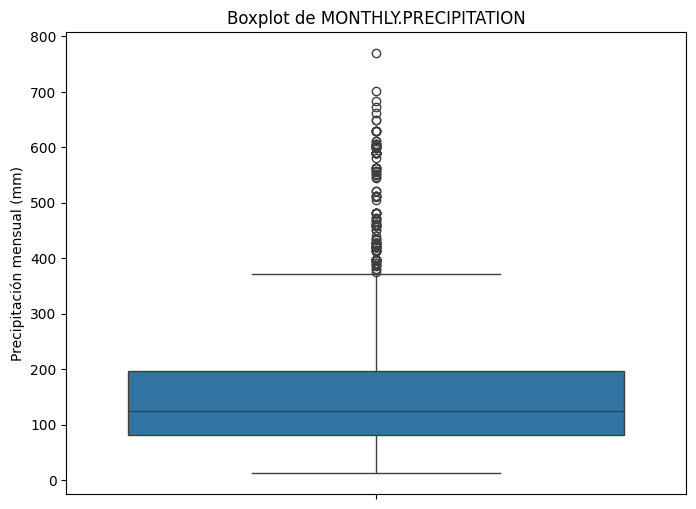

In [ ]:
# 3. Visualización: Boxplot de 'MONTHLY.PRECIPITATION'
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['MONTHLY.PRECIPITATION'])
plt.title('Boxplot de MONTHLY.PRECIPITATION')
plt.ylabel('Precipitación mensual (mm)')
plt.show()

# 4. Analisis univariado cobertura del agua
se calculó un buffer de 500m a partir de las coordenadas del registro y se obtuvo la proporción de cobertura de agua

In [ ]:
# 1. Descripción estadística básica de la variable 'cobertura_agua_proporcion'
descripcion = data['cobertura_agua_proporcion'].describe()
print("Descripción estadística de cobertura_agua_proporcion:")
print(descripcion)

Descripción estadística de cobertura_agua_proporcion:
count    2958.000000
mean        0.776139
std         0.271662
min         0.000000
25%         0.776139
50%         0.776139
75%         0.959739
max         1.756380
Name: cobertura_agua_proporcion, dtype: float64


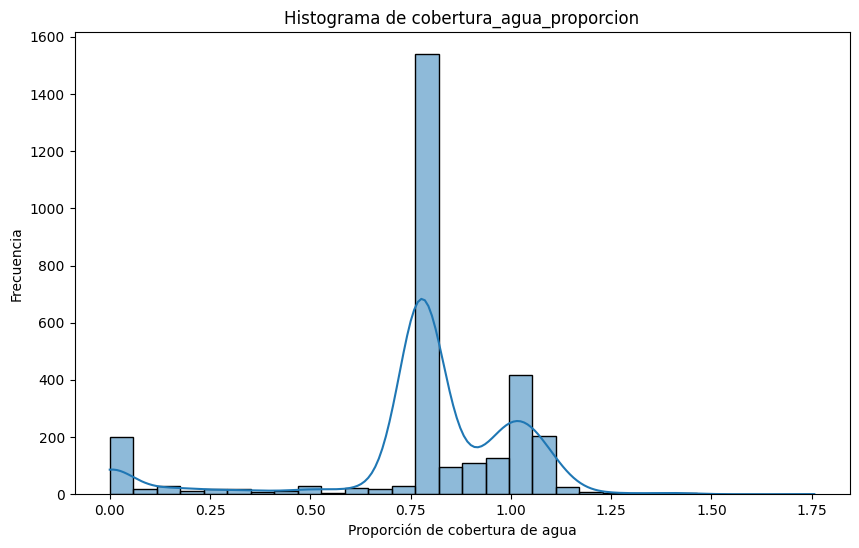

In [ ]:
# 2. Visualización: Histograma de 'cobertura_agua_proporcion'
plt.figure(figsize=(10, 6))
sns.histplot(data['cobertura_agua_proporcion'], bins=30, kde=True)
plt.title('Histograma de cobertura_agua_proporcion')
plt.xlabel('Proporción de cobertura de agua')
plt.ylabel('Frecuencia')
plt.show()

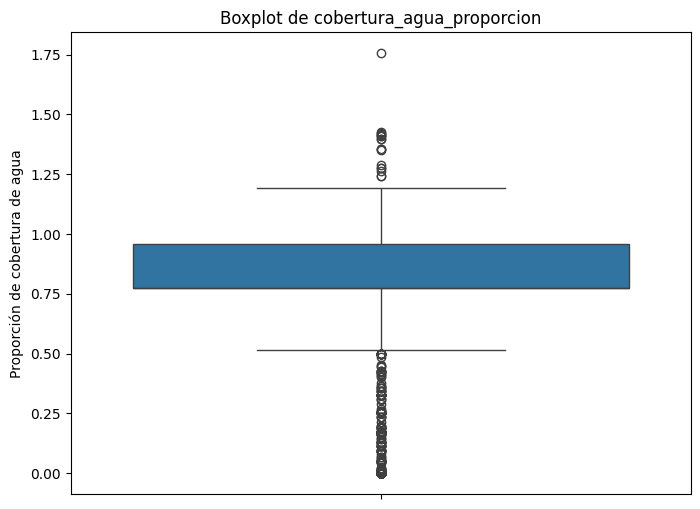

In [ ]:
# 3. Visualización: Boxplot de 'cobertura_agua_proporcion'
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['cobertura_agua_proporcion'])
plt.title('Boxplot de cobertura_agua_proporcion')
plt.ylabel('Proporción de cobertura de agua')
plt.show()

## 5. Codificación de variables categóricas

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
# Verificar el nombre exacto de las columnas en el dataset
print(data.columns)

Index(['GLOBAL.UNIQUE.IDENTIFIER', 'OBSERVATION.COUNT', 'LATITUDE',
       'LONGITUDE', 'OBSERVATION.DATE', 'PROTOCOL.TYPE', 'DAILY.PRECIPITATION',
       'MONTHLY.PRECIPITATION', 'MONTLY.TEMPERATURE',
       'cobertura_agua_proporcion'],
      dtype='object')


In [ ]:
# 2. Codificación de 'PROTOCOL.TYPE' usando One Hot Encoding
data = pd.get_dummies(data, columns=['PROTOCOL.TYPE'], prefix='PROTOCOL')

In [ ]:
# Mostrar las primeras filas del dataset para confirmar las codificaciones
print(data.head())

                          GLOBAL.UNIQUE.IDENTIFIER  OBSERVATION.COUNT  \
0   URN:CornellLabOfOrnithology:EBIRD:OBS409764406                  1   
1   URN:CornellLabOfOrnithology:EBIRD:OBS666054430                  2   
2  URN:CornellLabOfOrnithology:EBIRD:OBS1227922401                  1   
3   URN:CornellLabOfOrnithology:EBIRD:OBS286564168                  1   
4   URN:CornellLabOfOrnithology:EBIRD:OBS372036947                  4   

   LATITUDE  LONGITUDE OBSERVATION.DATE  DAILY.PRECIPITATION  \
0  6.405548 -75.424361       11/17/2001            20.287292   
1  6.984203 -75.112168        1/22/2011             0.000000   
2  6.969255 -75.129226        3/25/2012            15.229471   
3  6.148342 -75.375985        9/21/2014             5.510858   
4  6.110034 -75.417152         1/2/2016             0.000000   

   MONTHLY.PRECIPITATION  MONTLY.TEMPERATURE  cobertura_agua_proporcion  \
0             201.623348           15.578088                   0.766961   
1              79.723187  

In [ ]:
data.to_csv('/content/drive/MyDrive/Análisis exploratorio de datos/datosLEYE-variables_codificado.csv', index=False)
print("Codificación completada. Archivo guardado como 'datosLEYE-variables_codificado.csv'.")


Codificación completada. Archivo guardado como 'datosLEYE-variables_codificado.csv'.


Ya tenemos la codificación lista de la variable PROTOCOL.TYPE, ahora vamos con la normalización. Antes de eso, identificamos outliers de la variable Temperatura.

In [ ]:
# Cargar el archivo CSV
file_path = '/content/drive/MyDrive/Análisis exploratorio de datos/datosLEYE-variables_codificado.csv'  # Actualiza la ruta del archivo
data = pd.read_csv(file_path)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(data.columns)

Index(['GLOBAL.UNIQUE.IDENTIFIER', 'OBSERVATION.COUNT', 'LATITUDE',
       'LONGITUDE', 'OBSERVATION.DATE', 'DAILY.PRECIPITATION',
       'MONTHLY.PRECIPITATION', 'MONTLY.TEMPERATURE',
       'cobertura_agua_proporcion', 'PROTOCOL_Area', 'PROTOCOL_Banding',
       'PROTOCOL_Historical', 'PROTOCOL_Incidental', 'PROTOCOL_Stationary',
       'PROTOCOL_Traveling'],
      dtype='object')


In [ ]:
# Cálculo de IQR para 'MONTHLY.TEMPERATURE'
Q1 = data['MONTLY.TEMPERATURE'].quantile(0.25)
Q3 = data['MONTLY.TEMPERATURE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [ ]:
# Identificación de outliers
outliers = data[(data['MONTLY.TEMPERATURE'] < lower_bound) | (data['MONTLY.TEMPERATURE'] > upper_bound)]


In [ ]:
# Mostrar los outliers encontrados
print("Outliers encontrados en 'MONTLY.TEMPERATURE':")
print(outliers)

Outliers encontrados en 'MONTLY.TEMPERATURE':
                             GLOBAL.UNIQUE.IDENTIFIER  OBSERVATION.COUNT  \
18     URN:CornellLabOfOrnithology:EBIRD:OBS712795696                  1   
19     URN:CornellLabOfOrnithology:EBIRD:OBS712137508                  1   
20     URN:CornellLabOfOrnithology:EBIRD:OBS713696583                  1   
621    URN:CornellLabOfOrnithology:EBIRD:OBS829830508                  1   
622    URN:CornellLabOfOrnithology:EBIRD:OBS826513563                  1   
...                                               ...                ...   
952    URN:CornellLabOfOrnithology:EBIRD:OBS876891308                  4   
984   URN:CornellLabOfOrnithology:EBIRD:OBS1708192771                  1   
986   URN:CornellLabOfOrnithology:EBIRD:OBS1708216911                  1   
1555   URN:CornellLabOfOrnithology:EBIRD:OBS752385244                  1   
1559   URN:CornellLabOfOrnithology:EBIRD:OBS752596122                  1   

      LATITUDE  LONGITUDE OBSERVATION.DAT

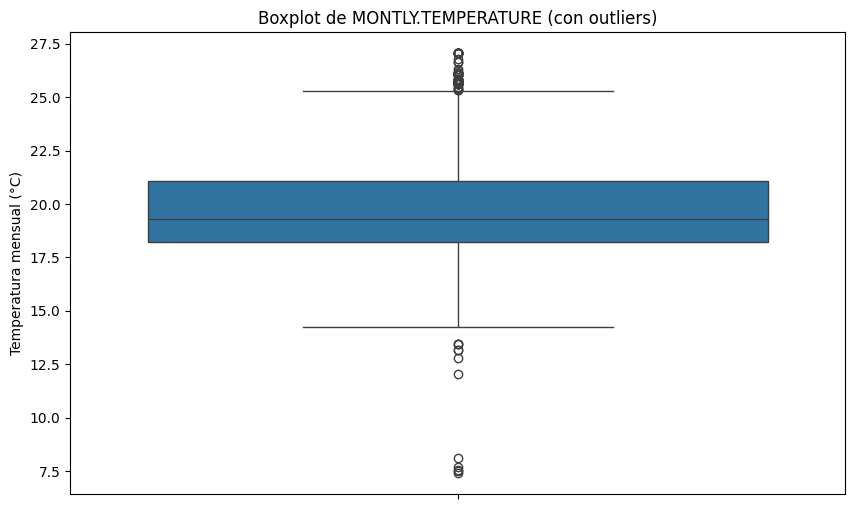

In [ ]:
# Visualización: Boxplot para identificar visualmente los outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data['MONTLY.TEMPERATURE'])
plt.title('Boxplot de MONTLY.TEMPERATURE (con outliers)')
plt.ylabel('Temperatura mensual (°C)')
plt.show()

Biológicamente esos outliers representan algo, por lo que no nos parece correcto eliminarlos. Procederemos a normalizar

Biologicamente normalizar los datos de temperatura y precipitación no es viable?